In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")
from time import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA    

# Pretty display for notebooks
%matplotlib inline

In [5]:
#without accuracy ---> 2
#SVM 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%pylab inline
from random import *
from subprocess import check_output
def Propublica_svm(X,Y):
    #Split data into training and test datasets (training will be based on 70% of data)
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0,shuffle=True) 
    #test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
    print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

    
    #Scaling data
    #from sklearn.preprocessing import StandardScaler
    
    from sklearn.model_selection import cross_val_score

    #sc = StandardScaler(with_mean=False)
    
    
    #sc.fit(X_train)
    #X_train_std = sc.transform(X_train)
    #X_test_std = sc.transform(X_test)

    #X_train_std and X_test_std are the scaled datasets to be used in algorithms

    #Applying SVC (Support Vector Classification)
    from sklearn.svm import SVC
    svm = SVC(kernel='rbf', random_state=1, gamma=.1, C=10.0,probability=True)
    svm.fit(X_train, Y_train)
    print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train, Y_train)))
    print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test, Y_test)))
    print('####Train prediction Label###############################################')
    Y_train_pred=svm.predict(X_train)
    #print(y_1)
    Y_test_pred=svm.predict(X_test)

    print('####Actual Train Label###############################################')


    print('####Change to colors###############################################')
    e=svm.predict_proba(X_test)
    print(e)
    print(Y_test_pred)
    
    return X_test,Y_test_pred,Y_test,e
     



Populating the interactive namespace from numpy and matplotlib


/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
#without accuracy ---> 2
def main(datax, y_test, y_test_pred,e): 
        
    n=datax.shape[1]
    s=datax.shape[0]    
    data = np.zeros((s, n), dtype = int)
    
    r = np.zeros(n, dtype = int) 
    
    for i in range(n):
        if int(y_test.iloc[i])==1 :
            r[i]=1
        else :
            r[i]= -1  
    
    r2 = np.zeros(n, dtype = int) 
    for i in range(n):
        if int(y_test_pred[i])==1 :
            r2[i]=1
        else :
            r2[i]= -1          
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        for i in range(n):
                data[j][i]= datax.iloc[j,i]
                if data[j][i]== 1 :
                    a=a+1
                    if r[i]==1:
                         acc1=acc1+1 

        print("ACTUAL----------total ,accepted, aceeptance rate:")             
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    print("data DP")
    print(DP)
    
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        prec=0
        reca=0
        accur=0
        FP=0
        FN=0
        TP=0
        TN=0
        for i in range(n):
             if data[j][i]== 1 :
                    a=a+1
                    if r2[i]==1:
                        acc1=acc1+1 
                        if r[i]==1:
                            TP=TP+1
                        else:
                             FP=FP+1                
                    else:
                        if r[i]==1:
                            FN=FN+1
                        else:
                            TN=TN+1    
        
        print("prec reca accuracy for each sens") 
        prec= float(TP/(TP+FP))
        reca= float(TP/(TP+FN))
        accur= float((TP+TN)/a)
        print(prec,reca,accur)
        
        print("SVM----------total , accepted, aceeptance rate:")             
        
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    print("data DP")
    print(DP) 
    
    print("SVM accuracy--------------------------")
    prec=0
    reca=0
    accur=0
    FP=0
    FN=0
    TP=0
    TN=0
    for i in range(n):
            if r2[i]==1:
                acc1=acc1+1 
                if r[i]==1:
                    TP=TP+1
                else:
                     FP=FP+1                
            else:
                if r[i]==1:
                     FN=FN+1
                else:
                     TN=TN+1    

        
    prec= float(TP/(TP+FP))
    reca= float(TP/(TP+FN))
    accur= float((TP+TN)/n)
    print(prec,reca,accur)
    
    
######################
    delta=1

    epsilon=[.01]
    #beta_converge = [0.4539,0.5119]
    beta_converge = [0.4539]
    alpha = [0,0.2,0.4,0.6,0.8,1]
    
    
    
    fi= np.zeros(n,dtype=int) 

    t=0
    gamma = [0.175442,    0.142103, 0.166039,    0.164754,  0.153465,    0.14,  0.104348 ]
    for eps in epsilon:
        for beta_avg in beta_converge:
            print("----------------This is for covergence at beta = ",beta_avg, " ----------------")
            for a in alpha:
                # no weighting basic weighting 1
                u1,u2=min_sum_lpca_g(data,gamma,eps,e,beta_avg,a)
                #######################Disp_impact#######################  
                print("alpha, beta_avg",a,beta_avg)
                accu_all=[]
                DP_all=[]
                precision_all=[]
                recall_all=[]
                ar_all=[]
                acceptance_rate=np.zeros((7,28),dtype=float)
                count=0
                t=t+1
                print("<--------------------------------------->")
                print("iteration t",t)
        #                 for alpha in np.arange(0,1.05,0.05):
        #                     print("alpha: ",alpha)
        #                     for i in range(n):

        #                         z=random()
        #                         if z < alpha:
        #                                fi[i]= u1[i] 

        #                         else:
        #                                fi[i]= r2[i]

                for i in range(n):
                     fi[i] = u1[i]


                for j in range(s):
                    print("sensitive attribute ",(j+1)) 

                    TP=0
                    FP=0
                    FN=0
                    TN=0
                    precision=0
                    recall=0
                    for i in range(n):
                         if data[j][i]== 1 :                        
                            if fi[i]==1 and r[i]==1:
                                TP=TP+1
                            if fi[i]==1 and r[i]==-1:
                                FP=FP+1 
                            if fi[i]==-1 and r[i]==1:
                                FN=FN+1
                            if fi[i]==-1 and r[i]==-1:
                                TN=TN+1    
                    if TP+FP !=0:
                        precision=float(TP/(TP+FP))
                    #print("precision",precision)
                    if TP+FN !=0:    
                        recall=float(TP/(TP+FN))
                   # print("recall",recall)

                    precision_all.append(precision)
                    recall_all.append(recall)
                    #print("TP,FP,TN,FN")
                    #print(TP,FP,TN,FN)

                    a=0
                    b=0
                    acc1=0
                    acc2=0
                    for i in range(n):
                            if data[j][i]== 1 :
                                a=a+1
                                if fi[i]==1:
                                     acc1=acc1+1 

        #                         print("total ,fair accepted, aceeptance rate:")             
                    a1=float(acc1/a)



        #                         print(a)
        #                         print(acc1)
        #                         print(a1)
                    ar_all.append(a1)

                count = count+1
                maxi=max(ar_all)
                mini= min(ar_all)
                DP=float(maxi-mini)
                print("individual acceptance rates")
                print(ar_all)
                print("individul precision")
                print(precision_all)
                print("individual recall")
                print(recall_all)
                print("DP all")
                print(DP)
                f_acc=0
                for i in range(n):
                     if fi[i] == r[i]:
                            f_acc=f_acc+1
                f_acc_l=float((f_acc*100)/n) 

        #######################################################################33   

        #                         print("sensitive attribute ",(j+1)) 





                TP=0
                FP=0
                FN=0
                TN=0
                precision=0
                recall=0
                accu=0
                for i in range(n):
                        if fi[i]==1 and r[i]==1:
                            TP=TP+1
                        if fi[i]==1 and r[i]==-1:
                            FP=FP+1 
                        if fi[i]==-1 and r[i]==1:
                            FN=FN+1
                        if fi[i]==-1 and r[i]==-1:
                            TN=TN+1    

                if TP+FP!=0:
                    precision=float(TP/(TP+FP))
                print("precision all",precision)
                if TP+FN!=0:
                    recall=float(TP/(TP+FN))


                print("recall all",recall)
                accu=float((TP+TN)/(TP+FN+TN+FP))


                print("accuracy all",accu)



                print("TP,FP,TN,FN")
                print(TP,FP,TN,FN)
        #                         print("total ,fair accepted, aceeptance rate:")             
                a1=float(acc1/a)
          

    print("<--------------------------------------->")
    alpha_weight=np.arange(0,1.05,.05)        
    return accu_all,DP_all,acceptance_rate,alpha_weight

In [10]:

#NG
import time
import pulp as p 
def min_sum_lpca_g(data1,beta,eps,e,beta_avg,alpha):
    import pulp as p 
    import math
    m=data1.shape[0]
    n=data1.shape[1]
    print('dimension of data')
    print(m,n)
    
    ################ sorted result
    h1=[]
    h2=[]
    h3=[]
    h4=[]
    key1=[]
    key2=[]
    key3=[]
    key4=[]
    cost=np.zeros(n,dtype=int)
    data2=np.zeros((m,n),dtype=int)
    for i in range(n):
        if data1[0][i]==1:            

            h1.append(e[i][1])
            key1.append(i)
        elif data1[1][i]==1:
            h2.append(e[i][1])
            key2.append(i)
            
        if data1[2][i]==1:
            h3.append(e[i][1])
            key3.append(i)
            
        elif data1[3][i]==1:
            h4.append(e[i][1])
            key4.append(i)    

#     print(hc)
#     print(key1)
    
    for i in range(1,len(h1)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h1[j-1]<h1[j]:
                index=j
                var=h1[j]
                h1[j]=h1[j-1]
                h1[j-1]=var

                var2=key1[j]
                key1[j]=key1[j-1]
                key1[j-1]=var2
            else:
                break
    
            
        

#     print(hc)
#     print(key1)   
    
#     print(lc)
#     print(key2)
    for i in range(1,len(h2)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h2[j-1]<h2[j]:
                index=j
                var=h2[j]
                h2[j]=h2[j-1]
                h2[j-1]=var

                var2=key2[j]
                key2[j]=key2[j-1]
                key2[j-1]=var2
            else:
                break
    for i in range(1,len(h3)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h3[j-1]<h3[j]:
                index=j
                var=h3[j]
                h3[j]=h3[j-1]
                h3[j-1]=var

                var2=key3[j]
                key3[j]=key3[j-1]
                key3[j-1]=var2
            else:
                break
                

#     print(hc)
#     print(key1)   
    
#     print(lc)
#     print(key2)
    for i in range(1,len(h4)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h4[j-1]<h4[j]:
                index=j
                var=h4[j]
                h4[j]=h4[j-1]
                h4[j-1]=var

                var2=key4[j]
                key4[j]=key4[j-1]
                key4[j-1]=var2
            else:
                break            
    '''  
    #basic1
    for j in range(len(key1)):    
        #data2[0][key1[j]]=((j+1)/((beta[0]*len(key1))*((beta[0]*len(key1))+1)/2)*alpha[0])
         
        data2[0][key1[j]]=(j+1)*alpha[0]
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*alpha[1]
    for j in range(len(key3)):
        data2[2][key3[j]]=(j+1)*alpha[2]              
        
    for j in range(len(key4)):
        data2[3][key4[j]]=(j+1)*alpha[3]
        
        
    '''      
    #basic2
            
    '''
    
    for j in range(len(key1)):    
        #data2[0][key1[j]]=((j+1)/((beta[0]*len(key1))*((beta[0]*len(key1))+1)/2)*alpha[0])
         
        data2[0][key1[j]]=(j+1)*alpha[0]
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*alpha[1]
    for j in range(len(key3)):
        if data1[2][key3[j]]==1 and data1[0][key3[j]]==1: 
            data2[2][key3[j]]=(j+1)*(len(key1)/len(key3))*alpha[2]
        else:
            data2[2][key3[j]]=(j+1)*(len(key2)/len(key3))*alpha[2]                        
    for j in range(len(key4)):
        if data1[3][key4[j]]==1 and data1[0][key4[j]]==1:                   
            data2[3][key4[j]]=(j+1)*(len(key1)/len(key4))*(len(key2)/len(key4))*alpha[3]
        else :                     
            data2[3][key4[j]]=(j+1)*(len(key2)/len(key4))*(len(key1)/len(key4))*alpha[3]
         
    '''
    
    
    
    
    
    
    
        
        
    ###############
        
    #############################33
    ''' 
        #basic1
    for j in range(len(key1)):    
        #data2[0][key1[j]]=((j+1)/((beta[0]*len(key1))*((beta[0]*len(key1))+1)/2)*alpha[0])
         
        data2[0][key1[j]]=(j+1)*alpha[0]
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*alpha[1]
    for j in range(len(key3)):
        data2[2][key3[j]]=(j+1)*alpha[2]              
        
    for j in range(len(key4)):
        data2[3][key4[j]]=(j+1)*alpha[3]
        
        
    #basic2
            
    '''
    alpha2=[1,1,1,1]
    for j in range(len(key1)):    
        #data2[0][key1[j]]=((j+1)/((beta[0]*len(key1))*((beta[0]*len(key1))+1)/2)*alpha[0])
         
        data2[0][key1[j]]=(j+1)*alpha2[0]
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*alpha2[1]
    for j in range(len(key3)):
        if data1[2][key3[j]]==1 and data1[0][key3[j]]==1: 
            data2[2][key3[j]]=(j+1)*(len(key1)/len(key3))*alpha2[2]
        else:
            data2[2][key3[j]]=(j+1)*(len(key2)/len(key3))*alpha2[2]                  
        
    for j in range(len(key4)):
        if data1[3][key4[j]]==1 and data1[0][key4[j]]==1:                   
            data2[3][key4[j]]=(j+1)*(len(key1)/len(key4))*alpha2[3]
        else :                     
            data2[3][key4[j]]=(j+1)*(len(key2)/len(key4))*alpha2[3]
            
    
    for j in range(n):
        sum=0
        for i in range(m):
       
            sum=sum+data2[i][j] 
        cost[j]=sum
    
    ###############################
        
    Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
#     X=np.zeros(n+1,dtype=p.LpVariable)
    X=np.zeros(n+m+1,dtype=p.LpVariable)
    Y=np.zeros(m,dtype=p.LpVariable)
    
    sizes=np.zeros(m,dtype=int)
#     report_index(index,data1,e):  
    max_size=0
    for i in range(m):
        count=0
        for j in range(n):
            if data1[i][j]==1:
                count=count+1 
        if count>max_size:
            max_size=count
        sizes[i]=count
    print(sizes)    
    #############################33
    
    
    
    
    ###############################
    beta_actual = [ 0.258, 0.540, 0.479, 0.234]
    
    select_sizes=np.zeros(m,dtype=int)
   
    size_final=np.zeros(m,dtype=int)

    for i in range(m):
        var1 = str(n+100+i)
        Y[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Continuous')
    
    for i in range(n):
        var1=str(i)       
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
   
    X[n]=p.LpVariable(str(n),lowBound=0,upBound=1,cat='Continuous')  


    #########objective function#####################

    Lp_prob+= p.lpSum([(X[j])*cost[j] for j in range(n)]) 
   
    for i in range(2*m):
        if i<m:

            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) >= Y[i]*sizes[i]
            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) <= (Y[i]+eps)*sizes[i]
    
    
    for i in range(m):
        if beta_actual[i] >= beta_avg:
            Lp_prob += Y[i] >= (1-alpha)*beta_actual[i] +alpha*beta_avg
            Lp_prob += Y[i] <= beta_actual[i]
        else:
            Lp_prob += Y[i] >= (1-alpha)*beta_actual[i] + alpha*beta_avg
            Lp_prob += Y[i] <= beta_avg    
            
         
        
    #####################################
    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status]) 
    print("objective is:")        
    print(p.value(Lp_prob.objective))
    print("discripency is:") 
    print(p.value(X[n]))
    x=np.zeros(n,dtype=float)

   # The solution status 
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
#             if(data1[2][i]==1):
#                 print("no")
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2   


In [11]:
# without accuracy
import time
# import pulp as p 
# from random import *
data= pd.read_csv('data/propublica/compass.csv', skipinitialspace=True)
# data = data1[data1["race"].isin(["african-american", "caucasian"])]

print(data['African_American'].value_counts())
print(data['Female'].value_counts())
# print(data.shape[0],data.shape[1])
data=data.drop(columns=['id'])
# print(data.head())
# Age_Above_FourtyFive,Age_Below_TwentyFive, African_American,Female,  Two_yr_Recidivism  



data_c = data.drop(columns=[ 'Two_yr_Recidivism' ])
# print(sens)
print(data_c.head())
r=data[['Two_yr_Recidivism']]

X_test,Y_test_pred,Y_test,e = Propublica_svm(data_c , r)

X_test.reset_index(drop=True, inplace=True)
# Y_test_pred.reset_index()

Y_test.reset_index(drop=True, inplace=True)

print(X_test)
print(Y_test_pred)
print(Y_test)
sens=X_test[['African_American','Female']]
print(sens)
p=sens.shape[0]


sens1 = pd.get_dummies(sens, columns=['African_American','Female'], prefix =['african_american','female'])
sensitive = sens1.T
print(sensitive)




1    3175
0    2103
Name: African_American, dtype: int64
0    4247
1    1031
Name: Female, dtype: int64
   Number_of_Priors  score_factor  Age_Above_FourtyFive  Age_Below_TwentyFive  \
0                 0             0                     0                     0   
1                 4             0                     0                     1   
2                14             1                     0                     0   
3                 0             0                     0                     0   
4                 0             0                     0                     0   

   African_American  Female  Misdemeanor  
0                 1       0            0  
1                 1       0            0  
2                 0       0            0  
3                 0       1            1  
4                 0       0            0  
There are 3694 samples in the training set and 1584 samples in the test set


/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of the SVM classifier on training data is 0.70
The accuracy of the SVM classifier on test data is 0.68
####Train prediction Label###############################################
####Actual Train Label###############################################
####Change to colors###############################################
[[0.27769831 0.72230169]
 [0.71624585 0.28375415]
 [0.70399223 0.29600777]
 ...
 [0.27880346 0.72119654]
 [0.47620161 0.52379839]
 [0.42266393 0.57733607]]
[1 0 0 ... 1 1 1]
      Number_of_Priors  score_factor  Age_Above_FourtyFive  \
0                    0             1                     0   
1                    2             0                     1   
2                    5             0                     0   
3                    2             1                     0   
4                    1             0                     0   
...                ...           ...                   ...   
1579                25             1                     0   
15

In [15]:
'''#check
for i in range(7):
    print(data.iloc[:,i].value_counts())
'''

hello
0     1667
1      953
2      583
3      417
4      287
5      245
6      173
7      157
8      130
9      118
10      86
11      72
13      59
12      51
14      44
15      41
16      29
17      26
19      22
21      18
18      17
20      16
22      15
23      12
24       9
25       8
27       6
28       5
26       3
33       2
29       2
36       1
37       1
30       1
38       1
31       1
Name: Number_of_Priors, dtype: int64
0    2753
1    2525
Name: score_factor, dtype: int64
0    4182
1    1096
Name: Age_Above_FourtyFive, dtype: int64
0    4122
1    1156
Name: Age_Below_TwentyFive, dtype: int64
1    3175
0    2103
Name: African_American, dtype: int64
0    4247
1    1031
Name: Female, dtype: int64
0    3440
1    1838
Name: Misdemeanor, dtype: int64


In [12]:
# LP5 results

accu_all,DP_all,acceptance_rate,alpha_weight = main(sensitive, Y_test, Y_test_pred,e )

sensitive attribute  1
ACTUAL----------total ,accepted, aceeptance rate:
624
238
0.3814102564102564
sensitive attribute  2
ACTUAL----------total ,accepted, aceeptance rate:
960
484
0.5041666666666667
sensitive attribute  3
ACTUAL----------total ,accepted, aceeptance rate:
1260
599
0.4753968253968254
sensitive attribute  4
ACTUAL----------total ,accepted, aceeptance rate:
324
123
0.37962962962962965
data acceptance rates
[0.3814102564102564, 0.5041666666666667, 0.4753968253968254, 0.37962962962962965]
data DP
0.124537037037037
sensitive attribute  1
prec reca accuracy for each sens
0.6335403726708074 0.42857142857142855 0.6875
SVM----------total , accepted, aceeptance rate:
624
161
0.25801282051282054
sensitive attribute  2
prec reca accuracy for each sens
0.6666666666666666 0.7148760330578512 0.6760416666666667
SVM----------total , accepted, aceeptance rate:
960
519
0.540625
sensitive attribute  3
prec reca accuracy for each sens
0.6556291390728477 0.66110183639399 0.6738095238095239
S

In [14]:
acc_rate= [[0.25801282051282054, 0.540625, 0.4793650793650794, 0.2345679012345679],
[0.29967948717948717, 0.5229166666666667, 0.4746031746031746, 0.2808641975308642],
[0.33653846153846156, 0.50625, 0.46904761904761905, 0.32407407407407407],
[0.3766025641025641, 0.48854166666666665, 0.4642857142857143, 0.36728395061728397],
[0.4150641025641026, 0.471875, 0.4595238095238095, 0.4104938271604938],
[0.4551282051282051, 0.45416666666666666, 0.45396825396825397, 0.4567901234567901]]


prec=[[0.6335403726708074, 0.6666666666666666, 0.6556291390728477, 0.6842105263157895],
[0.5989304812834224, 0.6713147410358565, 0.6555183946488294, 0.6263736263736264],
[0.5666666666666667, 0.6707818930041153, 0.6480541455160744, 0.5904761904761905],
[0.5404255319148936, 0.6801705756929638, 0.6547008547008547, 0.5294117647058824],
[0.5135135135135135, 0.6843267108167771, 0.6528497409326425, 0.48872180451127817],
[0.49295774647887325, 0.6880733944954128, 0.6573426573426573, 0.43243243243243246]]

rec=[[0.42857142857142855, 0.7148760330578512, 0.66110183639399, 0.42276422764227645],
[0.47058823529411764, 0.6962809917355371, 0.654424040066778, 0.4634146341463415],
[0.5, 0.6735537190082644, 0.6393989983305509, 0.5040650406504065],
[0.5336134453781513, 0.6590909090909091, 0.6393989983305509, 0.5121951219512195],
[0.5588235294117647, 0.640495867768595, 0.6310517529215359, 0.5284552845528455],
[0.5882352941176471, 0.6198347107438017, 0.6277128547579299, 0.5203252032520326]]

accu=[0.6805,.6761,.6666, 0.6628,.6542, 0.6452]
#0.5756,0.6218  0.6674,0.6788  0.6188,0.6451  0.6016,0.6097
#R P P R
weighted_precision=[]
weighted_recall=[]
p=[1,2]
r=[0,3]
print(np.transpose(acc_rate))
weight_prec=0
weight_p=0
weight_rec=0
weight_r=0
sizes=[624,960,1260,324]
dp_list=[]

for i in range(6):
    weight_prec=0
    weight_rec=0
    weight_p=0
    weight_r=0
    acc_list=[]
    for j in range(4):
        #print(j)
        if j in p:
            weight_prec=weight_prec+sizes[j]*prec[i][j]
            weight_p=weight_p+sizes[j]
            #print(j)
        if j in r:    
            weight_rec=weight_rec+sizes[j]*rec[i][j]
            weight_r=weight_r+sizes[j]
        #print(acc_rate[i][j])    
        acc_list.append(acc_rate[i][j])
    #print(acc_list)
    dp=max(acc_list)-min(acc_list)   
    dp_list.append(dp)     
    wp=weight_prec/weight_p
    wr=weight_rec/weight_r
    weighted_precision.append(wp)
    weighted_recall.append(wr)
print(weighted_precision, weighted_recall,accu,dp_list)

[[0.25801282 0.29967949 0.33653846 0.37660256 0.4150641  0.45512821]
 [0.540625   0.52291667 0.50625    0.48854167 0.471875   0.45416667]
 [0.47936508 0.47460317 0.46904762 0.46428571 0.45952381 0.45396825]
 [0.2345679  0.2808642  0.32407407 0.36728395 0.41049383 0.45679012]]
[0.6604021239782829, 0.6623492471405168, 0.6578823606460381, 0.6657147881028478, 0.6664614035852412, 0.670631624760065] [0.42658668901336383, 0.4681364981929789, 0.5013893176906452, 0.5262932588904657, 0.5484445090169442, 0.5650255162268674] [0.6805, 0.6761, 0.6666, 0.6628, 0.6542, 0.6452] [0.30605709876543213, 0.24205246913580247, 0.1821759259259259, 0.12125771604938268, 0.06138117283950617, 0.002821869488536133]


In [15]:
#LP4 withcv without cv result
#->1,4,,5,6
weight_prec=weighted_precision
weight_rec=weighted_recall
accu=accu
'''
0.6604,0.6604
0.4265,0.4265
0.6805,0.6805

0.6494,0.6657
0.0.5124,5262
0.6489,0.6628

0.64602,0.6664
0.5568,0.5484
0.6426,0.6542

0.6398,0.6706
0.5845,0.5650
0.63,0.6452
'''
weight_prec_no_cv=[0.6604021239782829, 0.6505369644985096, 0.6502701234793733, 0.6494140523991272, 0.6460299987047404, 0.6398757453803325]
weight_rec_no_cv=[0.42658668901336383, 0.4653708349656628, 0.46816244250092753, 0.5124908870618331, 0.5568193316227386, 0.5845148803578238]
accu_no_cv=[0.6805, 0.6672, 0.654, 0.6489, 0.6426, 0.63]

dp=[0.30605709876543213, 0.24205246913580247, 0.1821759259259259, 0.12125771604938268, 0.06138117283950617, 0.002821869488536133]





In [10]:
#padala#1

import numpy as np
recall=[ [0.7210743801652892, 0.542016806722689, 0.654424040066778, 0.6991869918699187],
[0.6900826446280992, 0.5882352941176471, 0.6377295492487479, 0.7479674796747967],
[0.6260330578512396, 0.5966386554621849, 0.5993322203672788, 0.6991869918699187],
 [0.6528925619834711, 0.6890756302521008, 0.6527545909849749, 0.7235772357723578]]

prec=np.zeros((4,4),dtype=float)
rec=np.zeros((4,4),dtype=float)
to=[1,0,2,3]
k=0
for i in range(4):
    for j in range(4):
        prec[j][i]=prec1[j][to[k]]
        rec[j][i]=rec1[j][to[k]]
    k=k+1  



#0.5756,0.6218  0.6674,0.6788  0.6188,0.6451  0.6016,0.6097
#R P P R
weighted_precision=[]
weighted_recall=[]
p=[]
r=[0,1,2,3]
#print(np.transpose(acc_rate))
weight_prec=0
weight_p=0
weight_rec=0
weight_r=0
sizes=[624,960,1260,324]
dp_list=[]

for i in range(4):
    weight_prec=0
    weight_rec=0
    weight_p=0
    weight_r=0
    acc_list=[]
    for j in range(4):
        #print(j)
        if j in p:
            weight_prec=weight_prec+sizes[j]*prec[i][j]
            weight_p=weight_p+sizes[j]
            #print(j)
        if j in r:    
            weight_rec=weight_rec+sizes[j]*rec[i][j]
            weight_r=weight_r+sizes[j]
        #print(acc_rate[i][j])    
        #acc_list.append(acc_rate[i][j])
    #print(acc_list)
    #dp=max(acc_list)-min(acc_list)   
    #dp_list.append(dp)     
    #wp=weight_prec/weight_p
    wr=weight_rec/weight_r
    #weighted_precision.append(wp)
    weighted_recall.append(wr)
print( weighted_recall)

[0.6570583232966003, 0.6551195889647865, 0.6171052523908518, 0.667193769511602]


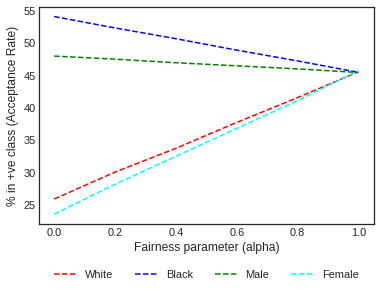

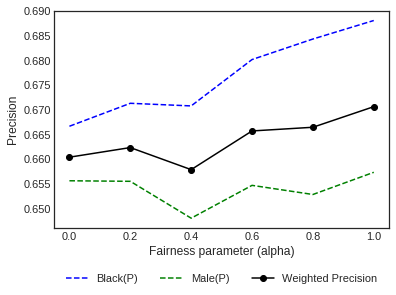

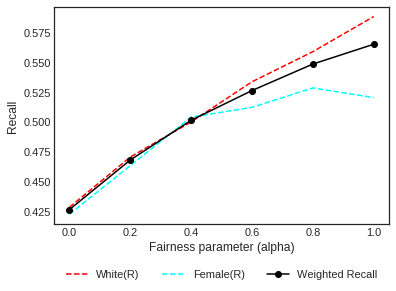

No handles with labels found to put in legend.


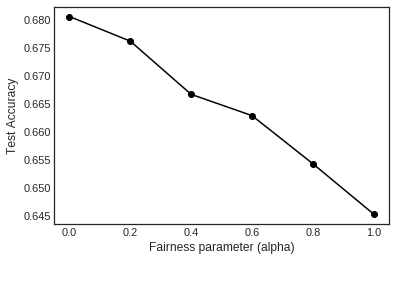

"\nplt.xlabel('Fairness parameter (alpha)')\nplt.ylabel('% Accuracy')\nplt.title('LP-5 Propublica')\nplt.plot(alpha, c,color='black', linestyle='dashed', marker='.',\n     markerfacecolor='black', markersize=10)\nplt.savefig('p5.png') \n"

In [5]:
####--->>>  result at  delta1=[.70],gama=[.40],epsilon=[.01]


import pulp as p 
import math
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-white')
alpha=[0 ,.2 ,.4 ,.6, .8 ,1]
#marital
#U=80, M=24928, S=11568, D=4612
# m_3, m_0, m_1, m_2
#age
#>60 and <25= a_1
#>=25and <=60 =a_2
# print(data.head())
# print(data.shape[0],data.shape[1])
 
a=[acc_rate[i][0]*100 for i in range(6)]  
b=[acc_rate[i][1]*100 for i in range(6)]  
c=[acc_rate[i][2]*100 for i in range(6)]  
d=[acc_rate[i][3]*100 for i in range(6)]   
 
#'divorced','married','single','unknown'
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha,a,label='White',color='red',linestyle='--') 
ax.plot(alpha,b,label='Black',color='blue',linestyle='--')  
ax.plot(alpha,c,label='Male',color='green',linestyle='--') 
ax.plot(alpha,d,label='Female',color='cyan',linestyle='--')


   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 


fig.savefig('p1.png') 
####--->>>  result at  delta1=[.70],gama=[.40],epsilon=[.01]


import pulp as p 
import math
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

alpha=[0 ,.2 ,.4 ,.6, .8 ,1]
#marital
#U=80, M=24928, S=11568, D=4612
# m_3, m_0, m_1, m_2
#age
#>60 and <25= a_1
#>=25and <=60 =a_2
# print(data.head())
# print(data.shape[0],data.shape[1])

b=[prec[i][1] for i in range(6)]  
c=[prec[i][2] for i in range(6)]  
x=[weight_prec[i] for i in range(6)]  
 
#'divorced','married','single','unknown'
fig = plt.figure()
ax = plt.subplot(111)

ax.plot(alpha,b,label='Black(P)',color='blue',linestyle='--')  
ax.plot(alpha,c,label='Male(P)',color='green',linestyle='--')
ax.plot(alpha,x,label='Weighted Precision',color='black',marker='o',linestyle='-') 



   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('Precision') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 

fig.savefig('p2.png') 
####--->>>  result at  delta1=[.70],gama=[.40],epsilon=[.01]


import pulp as p 
import math
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

alpha=[0 ,.2 ,.4 ,.6, .8 ,1]
#marital
#U=80, M=24928, S=11568, D=4612
# m_3, m_0, m_1, m_2
#age
#>60 and <25= a_1
#>=25and <=60 =a_2
# print(data.head())
# print(data.shape[0],data.shape[1])
   
    
a=[rec[i][0] for i in range(6)]  

d=[rec[i][3] for i in range(6)]  
y=[weight_rec[i] for i in range(6)]   
#'divorced','married','single','unknown'
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha,a,label='White(R)',color='red',linestyle='--') 
ax.plot(alpha,d,label='Female(R)',color='cyan',linestyle='--')

ax.plot(alpha,y,label='Weighted Recall',color='black',marker='o',linestyle='-') 

   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('Recall') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 

fig.savefig('p2.png') 



import pulp as p 
import math
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np

alpha=[0 ,.2 ,.4 ,.6, .8 ,1]
#marital
#U=80, M=24928, S=11568, D=4612
# m_3, m_0, m_1, m_2
#age
#>60 and <25= a_1
#>=25and <=60 =a_2
# print(data.head())
# print(data.shape[0],data.shape[1])
 
z=[accu[i] for i in range(6)]  

 
#'divorced','married','single','unknown'
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha,z,label='',color='black',marker='o',linestyle='-') 
 


plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('Test Accuracy') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 

'''
plt.xlabel('Fairness parameter (alpha)')
plt.ylabel('% Accuracy')
plt.title('LP-5 Propublica')
plt.plot(alpha, c,color='black', linestyle='dashed', marker='.',
     markerfacecolor='black', markersize=10)
plt.savefig('p5.png') 
'''

In [ ]:
acc_rate= [[0.25801282051282054, 0.540625, 0.4793650793650794, 0.2345679012345679],
[0.29967948717948717, 0.5229166666666667, 0.4746031746031746, 0.2808641975308642],
[0.33653846153846156, 0.50625, 0.46904761904761905, 0.32407407407407407],
[0.3766025641025641, 0.48854166666666665, 0.4642857142857143, 0.36728395061728397],
[0.4150641025641026, 0.471875, 0.4595238095238095, 0.4104938271604938],
[0.4551282051282051, 0.45416666666666666, 0.45396825396825397, 0.4567901234567901]]


prec=[[0.6335403726708074, 0.6666666666666666, 0.6556291390728477, 0.6842105263157895],
[0.5989304812834224, 0.6713147410358565, 0.6555183946488294, 0.6263736263736264],
[0.5666666666666667, 0.6707818930041153, 0.6480541455160744, 0.5904761904761905],
[0.5404255319148936, 0.6801705756929638, 0.6547008547008547, 0.5294117647058824],
[0.5135135135135135, 0.6843267108167771, 0.6528497409326425, 0.48872180451127817],
[0.49295774647887325, 0.6880733944954128, 0.6573426573426573, 0.43243243243243246]]

rec=[[0.42857142857142855, 0.7148760330578512, 0.66110183639399, 0.42276422764227645],
[0.47058823529411764, 0.6962809917355371, 0.654424040066778, 0.4634146341463415],
[0.5, 0.6735537190082644, 0.6393989983305509, 0.5040650406504065],
[0.5336134453781513, 0.6590909090909091, 0.6393989983305509, 0.5121951219512195],
[0.5588235294117647, 0.640495867768595, 0.6310517529215359, 0.5284552845528455],
[0.5882352941176471, 0.6198347107438017, 0.6277128547579299, 0.5203252032520326]]

accu=[0.6805,.6761,.6666, 0.6628,.6542, 0.6452]
#0.5756,0.6218  0.6674,0.6788  0.6188,0.6451  0.6016,0.6097
#R P P R
weighted_precision=[]
weighted_recall=[]
p=[1,2]
r=[0,3]
print(np.transpose(acc_rate))
weight_prec=0
weight_p=0
weight_rec=0
weight_r=0
sizes=[624,960,1260,324]
dp_list=[]

for i in range(6):
    weight_prec=0
    weight_rec=0
    weight_p=0
    weight_r=0
    acc_list=[]
    for j in range(4):
        #print(j)
        if j in p:
            weight_prec=weight_prec+sizes[j]*prec[i][j]
            weight_p=weight_p+sizes[j]
            #print(j)
        if j in r:    
            weight_rec=weight_rec+sizes[j]*rec[i][j]
            weight_r=weight_r+sizes[j]
        #print(acc_rate[i][j])    
        acc_list.append(acc_rate[i][j])
    #print(acc_list)
    dp=max(acc_list)-min(acc_list)   
    dp_list.append(dp)     
    wp=weight_prec/weight_p
    wr=weight_rec/weight_r
    weighted_precision.append(wp)
    weighted_recall.append(wr)
print(weighted_precision, weighted_recall,accu,dp_list)
weight_prec=weighted_precision
weight_rec=weighted_recall
accu=accu

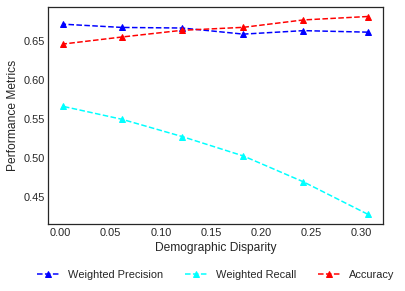

In [20]:
#LP5 Result
import pulp as p 
import math
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import matplotlib.pyplot as plt
import numpy as np

alpha=[0 ,.2 ,.4 ,.6, .8 ,1]
#marital
#U=80, M=24928, S=11568, D=4612
# m_3, m_0, m_1, m_2
#age
#>60 and <25= a_1
#>=25and <=60 =a_2
# print(data.head())
# print(data.shape[0],data.shape[1])
 
x=[weight_prec[i] for i in range(6)]
y=[weight_rec[i] for i in range(6)]  
z=[accu[i] for i in range(6)]   
dp_a= [0.30605709876543213, 0.24205246913580247, 0.1821759259259259, 0.12125771604938268, 0.06138117283950617, 0.002821869488536133]
#'divorced','married','single','unknown'
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(dp_a,x,label='Weighted Precision',color='blue',marker='^',linestyle='--')
ax.plot(dp_a,y,label='Weighted Recall',color='cyan',marker='^',linestyle='--')
ax.plot(dp_a,z,label='Accuracy',color='red',marker='^',linestyle='--') 
 


plt.title('')
ax.set_xlabel('Demographic Disparity')
ax.set_ylabel('Performance Metrics') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 


In [22]:
prec=[[0.6532258064516129, 0.7604166666666666, 0.7341269841269841, 0.65625],
[0.6241610738255033, 0.7391304347826086, 0.7052980132450332, 0.6493506493506493],
[0.5828877005347594, 0.7152777777777778, 0.6798941798941799, 0.5979381443298969],
[0.5381526104417671, 0.6796875, 0.6468253968253969, 0.5348837209302325],
[0.515358361774744, 0.6718403547671841, 0.6351351351351351, 0.5131578947368421],
[0.5, 0.6625, 0.6238095238095238, 0.5],
[0.4647887323943662, 0.6526508226691042, 0.6002785515320335, 0.4945652173913043]]


rec=[[0.3403361344537815, 0.30165289256198347, 0.3088480801335559, 0.34146341463414637],
[0.3907563025210084, 0.3512396694214876, 0.3555926544240401, 0.4065040650406504],
[0.4579831932773109, 0.4256198347107438, 0.4290484140233723, 0.4715447154471545],
[0.5630252100840336, 0.5392561983471075, 0.5442404006677797, 0.5609756097560976],
[0.634453781512605, 0.6260330578512396, 0.6277128547579299, 0.6341463414634146],
[0.6554621848739496, 0.6570247933884298, 0.656093489148581, 0.6585365853658537],
[0.6932773109243697, 0.737603305785124, 0.7195325542570952, 0.7398373983739838]]


accu=[0.6313, 0.6369, 0.6420, 0.6433, 0.6477, 0.6426 ,0.6338]


beta=[.20,.24,.30,.40,.47,.50,.57]

beta_p=[]
beta_r=[]
beta_check=[.25,.54,.479,.2345]
import numpy as np


#P R P R P R R 
#0.7251,0.8101 0.5470,0.7329 0.6311,0.7389 0.5308,0.6172 0.6764,0.4776  0.4666,0.5333  0.2666,0.7333
#      
weighted_precision=[]
weighted_recall=[]
#p=[]
#r=[0,2,4,1,3,5,6]

dp_list=[]
sizes=[624,960,1260,324]
for i in range(7):
    weight_prec=0
    weight_p=0
    weight_rec=0
    weight_r=0
    cnt1=0
    cnt2=0
    for j in range(4):
        #print(j)
              
        
        if beta[i] <=beta_check[j]:
            weight_prec=weight_prec+sizes[j]*prec[i][j]
            weight_p=weight_p+sizes[j]
            cnt1=1
        else:  
            weight_rec=weight_rec+sizes[j]*rec[i][j]
            weight_r=weight_r+sizes[j]
            cnt2=1
    if cnt1==1:
        wp=weight_prec/weight_p
        weighted_precision.append(wp)
        beta_p.append(beta[i])

    if cnt2==1: 
        wr=weight_rec/weight_r
        weighted_recall.append(wr) 
        beta_r.append(beta[i])
            
   
    
    
len1=(len(weighted_precision)) 
len2=(len(weighted_recall)) 
    
print(weighted_precision, weighted_recall,beta_p,beta_r,len1,len2)
'''
[0.9520125938773091, 0.9403591343418822, 0.8608764055619338],0.8561212064210523, 0.8128034718440105, 0.782912341254576, 0.7358009995069338
0.4610404591572201, 0.5551300667433751, 0.5983458776930215, 0.6580824258162613,0.6476895465902177, 0.7070185074558867, 0.754950250161771
'''

[0.7181937825839035, 0.6989160422458369, 0.6951951951951951, 0.661036036036036, 0.6510076625435887, 0.6625] [0.40650406504065045, 0.46261814389232075, 0.5623247137694226, 0.6343487070654134, 0.6562735748854588, 0.7219136840301882] [0.2, 0.24, 0.3, 0.4, 0.47, 0.5] [0.24, 0.3, 0.4, 0.47, 0.5, 0.57] 6 6


'\n[0.9520125938773091, 0.9403591343418822, 0.8608764055619338],0.8561212064210523, 0.8128034718440105, 0.782912341254576, 0.7358009995069338\n0.4610404591572201, 0.5551300667433751, 0.5983458776930215, 0.6580824258162613,0.6476895465902177, 0.7070185074558867, 0.754950250161771\n'

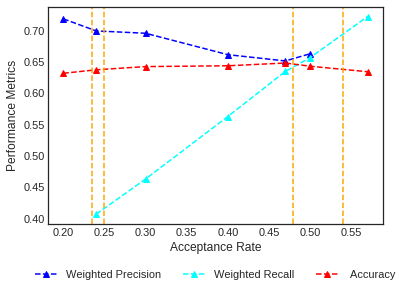

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.
plt.style.use('seaborn-white')


'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)
weighted_precision=[0.7181937825839035, 0.6989160422458369, 0.6951951951951951, 0.661036036036036, 0.6510076625435887, 0.6625]
weighted_recall= [0.40650406504065045, 0.46261814389232075, 0.5623247137694226, 0.6343487070654134, 0.6562735748854588, 0.7219136840301882] 
beta1=[0.2, 0.24, 0.3, 0.4, 0.47, 0.5]
beta2=[0.24, 0.3, 0.4, 0.47, 0.5, 0.57]
 
accu=[0.6313, 0.6369, 0.6420, 0.6433, 0.6477, 0.6426 ,0.6338]
'''
weighted_precision=[0.9520125938773091, 0.9403591343418822, 0.8608764055619338,0.8561212064210523, 0.8128034718440105, 0.782912341254576, 0.7358009995069338]
weighted_recall=[0.4610404591572201, 0.5551300667433751, 0.5983458776930215, 0.6580824258162613,0.6476895465902177, 0.7070185074558867, 0.754950250161771]
beta1=[.02,.025,.05,.1,.14,.16,.2]
beta2=[.1,.14,.16,.2,.25,.3,.35]

accu=[ 0.7774,0.7813,0.7954,0.8157,0.82442,0.8245,0.8216,0.8146,0.7954,0.7699]
'''
ax.plot(beta1,weighted_precision,label='Weighted Precision',color='blue',marker='^',linestyle='--')  
ax.plot(beta2,weighted_recall,label='Weighted Recall',color='cyan',marker='^',linestyle='--')
ax.plot(beta,accu,label=' Accuracy',color='red',marker='^',linestyle='--')
#ax.vlines(y=[.1992], ymin=[0], ymax=[1], colors='purple', linestyles='--', lw=2, label='PRedict avg. acc.')
#plt.axvline(.1992, color='green', linestyle='--')
#plt.axvline(.10, color='orange', linestyle='--')
#plt.axvline(.20, color='orange', linestyle='--')
plt.axvline(.25, color='orange', linestyle='--')
plt.axvline(.54, color='orange', linestyle='--')
plt.axvline(.479, color='orange', linestyle='--')
plt.axvline(.2345, color='orange', linestyle='--')

 


plt.title('')
ax.set_xlabel('Acceptance Rate')
ax.set_ylabel('Performance Metrics') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 